In [11]:
from sklearn.datasets import make_moons
import torch

n_samples = 1000

X,y = make_moons(n_samples=n_samples,
                 shuffle = True,
                 noise = 0.02,
                 random_state = 42)

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X,y


(tensor([[-0.0033,  0.3834],
         [ 0.9435, -0.4815],
         [ 0.9258, -0.4495],
         ...,
         [ 1.6496, -0.2837],
         [-0.9294,  0.3664],
         [ 0.7982,  0.6025]]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
         1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
         1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
         0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
         1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
         0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
         0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
         1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
         1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,


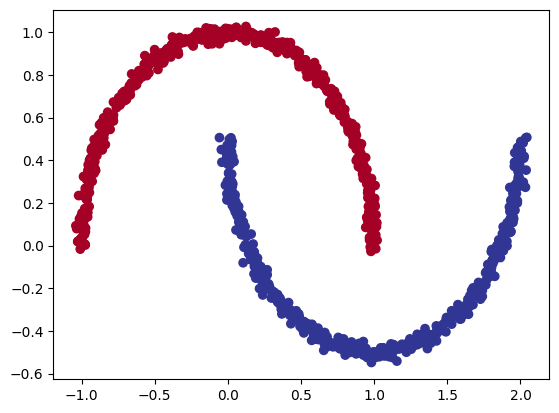

In [12]:
import matplotlib.pyplot as plt
plt.scatter(x= X[:,0],
            y= X[:,1],
            c = y,
            cmap = plt.cm.RdYlBu)

In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)


In [14]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [15]:
class MoonDatasetClassifier(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = torch.nn.Linear(in_features = 2,out_features=10)
    self.layer2 = torch.nn.Linear(in_features = 10,out_features = 5)
    self.layer3 = torch.nn.Linear(in_features=5,out_features = 1)
    self.relu = torch.nn.ReLU()

  def forward(self,x):
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))


model0 = MoonDatasetClassifier().to(device)
model0


MoonDatasetClassifier(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=5, bias=True)
  (layer3): Linear(in_features=5, out_features=1, bias=True)
  (relu): ReLU()
)

In [16]:
loss_fn = torch.nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params = model0.parameters(),
                            lr = 0.1)



In [17]:
X_train,y_train = X_train.to(device),y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)

print(X_train.dtype)

epochs = 1000

for epoch in range(epochs):
  model0.train()

  y_train_logits = model0(X_train).squeeze()

  loss = loss_fn(y_train_logits,y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model0.eval()

  with torch.inference_mode():
    y_test_logits = model0(X_test).squeeze()
    test_loss = loss_fn(y_test_logits,y_test)
    y_test_preds = torch.round(torch.sigmoid(y_test_logits))
    acc = (y_test_preds.round() == y_test).float().mean()
    acc = (float(acc))*100

  if epoch % 100 == 0:
    print(f"Epoch : {epoch}   |  Loss : {loss:.5f}  |  Test Loss : {test_loss:.5f}   |   Accuracy : {acc:.5f}" )





torch.float32
Epoch : 0   |  Loss : 0.72418  |  Test Loss : 0.72265   |   Accuracy : 50.00000
Epoch : 100   |  Loss : 0.41793  |  Test Loss : 0.43226   |   Accuracy : 78.00000
Epoch : 200   |  Loss : 0.24230  |  Test Loss : 0.24526   |   Accuracy : 90.00000
Epoch : 300   |  Loss : 0.22383  |  Test Loss : 0.21900   |   Accuracy : 91.00000
Epoch : 400   |  Loss : 0.21749  |  Test Loss : 0.20955   |   Accuracy : 91.00000
Epoch : 500   |  Loss : 0.21298  |  Test Loss : 0.20328   |   Accuracy : 90.50000
Epoch : 600   |  Loss : 0.20958  |  Test Loss : 0.19847   |   Accuracy : 90.50000
Epoch : 700   |  Loss : 0.20642  |  Test Loss : 0.19424   |   Accuracy : 89.50000
Epoch : 800   |  Loss : 0.19868  |  Test Loss : 0.18603   |   Accuracy : 91.00000
Epoch : 900   |  Loss : 0.16495  |  Test Loss : 0.15399   |   Accuracy : 94.00000
